## Import Libraries and Read data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from collections import defaultdict
from scipy.stats import chi2_contingency, f_oneway
from dotenv import load_dotenv
from joblib import dump, load
import os
%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
os.getenv('Data_Path')

'D:\\Internships\\Cellula\\Projects\\First\\Hotel-Reservations\\model-training\\data.csv'

In [4]:
data = pd.read_csv(fr"{os.getenv('Data_Path')}")

## EDA

In [5]:
data.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price   \
0        224             Offline         0    0        0           88.00   
1          5              Online         0    0        0          106.68   
2          1              Online         0    0        0           50.00   
3        211              Online         0    0        0          100.00   
4         48              Online         0    0        0           77.00   

   special requests date of reservation booking status  
0                 0           10/2/2015   Not_Canceled  
1                 1           11/6/2018   Not_Canceled  
2                 0           2/28/2018       Canceled  
3                 1           5/20/2017       Canceled  
4                 0           4/11/2018       Canceled

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [7]:
data.isna().sum().sort_values()

Booking_ID                  0
special requests            0
average price               0
P-not-C                     0
P-C                         0
repeated                    0
market segment type         0
date of reservation         0
lead time                   0
car parking space           0
type of meal                0
number of week nights       0
number of weekend nights    0
number of children          0
number of adults            0
room type                   0
booking status              0
dtype: int64

In [8]:
features_frame = data.drop(['booking status','Booking_ID'], axis= 1)
target = data["booking status"]

<Axes: xlabel='booking status', ylabel='count'>

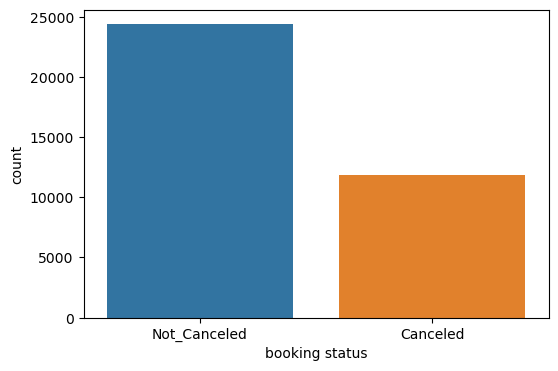

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x="booking status", data= data)

### Notes:
Needs down or up sampling due to class imbalance.

### Categorical Features

<Axes: xlabel='type of meal', ylabel='count'>

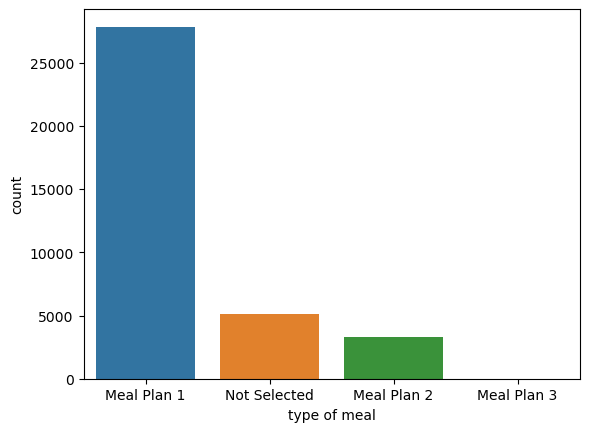

In [10]:
sns.countplot(x="type of meal", data= features_frame)

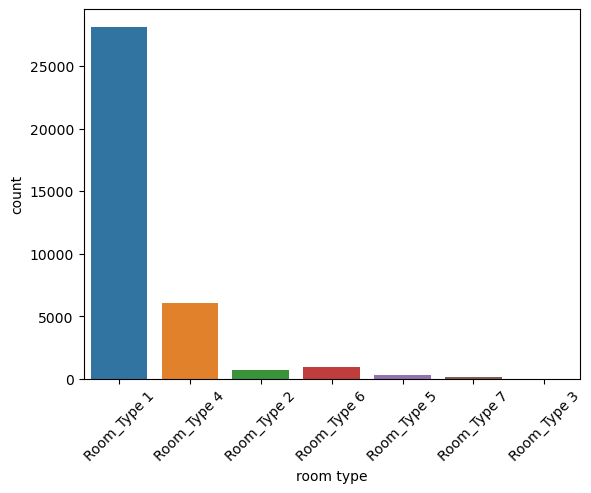

In [11]:
plt.Figure(figsize=(8,8))
room_plot = sns.countplot(x="room type", data= features_frame)
room_plot.set_xticklabels(room_plot.get_xticklabels(), rotation=45)
plt.show()

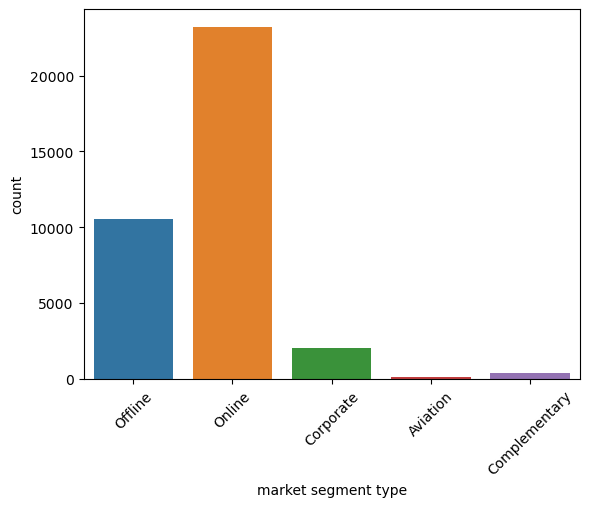

In [12]:
plt.Figure(figsize=(10,3))
room_plot = sns.countplot(x="market segment type", data= features_frame)
room_plot.set_xticklabels(room_plot.get_xticklabels(), rotation=45)
plt.show()

[None]

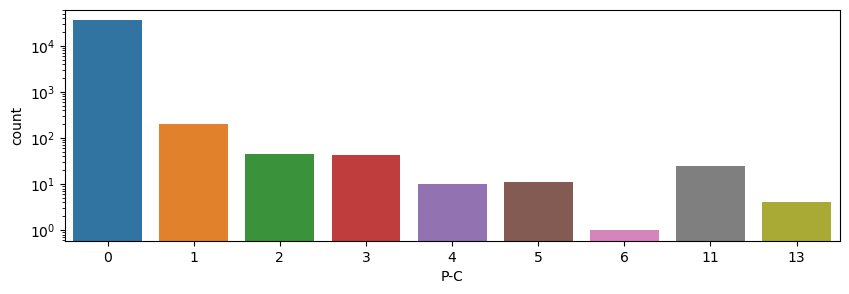

In [13]:
plt.figure(figsize=(10,3))
s = sns.countplot(x= "P-C", data= features_frame)
s.set(yscale= 'log')

[None]

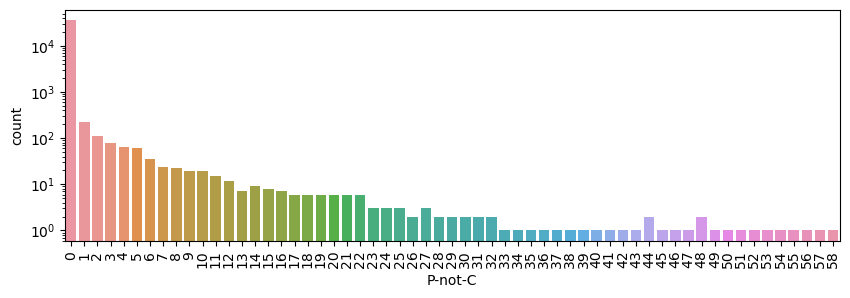

In [14]:
plt.figure(figsize=(10,3))
plot_pnotc = sns.countplot(x= "P-not-C", data= features_frame)
plt.xticks(rotation= 90)
plot_pnotc.set(yscale= 'log')

<Axes: xlabel='car parking space', ylabel='count'>

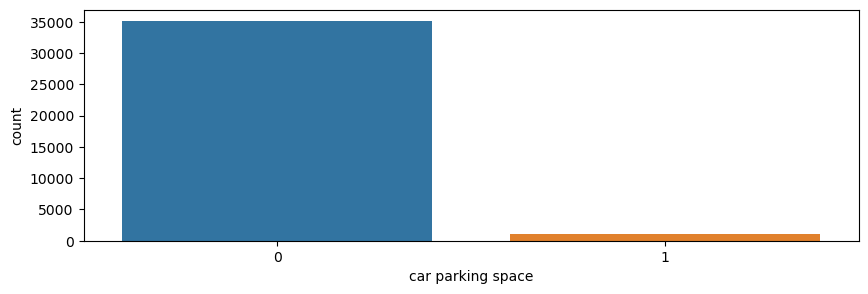

In [15]:
plt.figure(figsize=(10,3))
sns.countplot(x='car parking space', data= features_frame)

<Axes: xlabel='repeated', ylabel='count'>

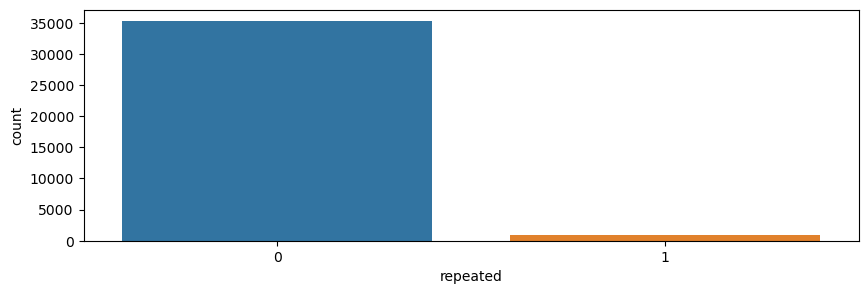

In [16]:
plt.figure(figsize=(10,3))
sns.countplot(x="repeated", data= features_frame)

In [17]:
target = target.reset_index().drop(['index'], axis= 1)
target["booking status"] = np.where(target['booking status'] == 'Not_Canceled',1, 0)

<Axes: xlabel='booking status', ylabel='count'>

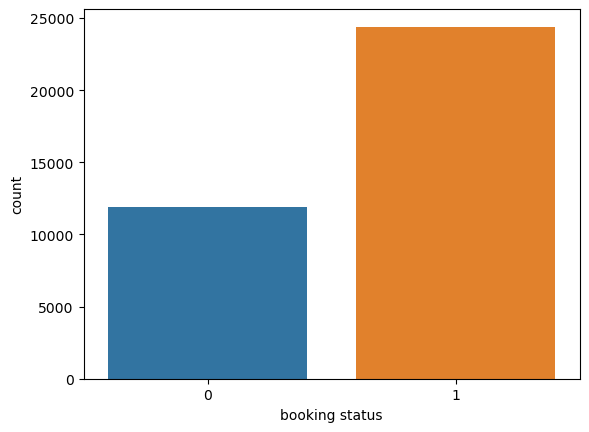

In [18]:
sns.countplot(x='booking status', data= target)

In [19]:
data["booking status"] = data["booking status"].apply(lambda x : 1 if x == 'Not_Canceled' else 0)
df_cat = data[['type of meal','car parking space', 'room type', 'market segment type', 'repeated',"booking status"]]
df_cat

type of meal  car parking space    room type market segment type  \
0       Meal Plan 1                  0  Room_Type 1             Offline   
1      Not Selected                  0  Room_Type 1              Online   
2       Meal Plan 1                  0  Room_Type 1              Online   
3       Meal Plan 1                  0  Room_Type 1              Online   
4      Not Selected                  0  Room_Type 1              Online   
...             ...                ...          ...                 ...   
36280   Meal Plan 2                  0  Room_Type 1              Online   
36281   Meal Plan 1                  0  Room_Type 1              Online   
36282   Meal Plan 1                  0  Room_Type 4              Online   
36283   Meal Plan 1                  0  Room_Type 1             Offline   
36284   Meal Plan 1                  0  Room_Type 4              Online   

       repeated  booking status  
0             0               1  
1             0               1  
2             0               0  
3             0               0  
4             0               0  
...         ...             ...  
36280         0               0  
36281         0               1  
36282         0               1  
36283         0               1  
36284         0               1  

[36285 rows x 6 columns]

In [20]:
meal_target = df_cat.groupby('type of meal')['booking status'].agg(['sum','count'])
meal_target['non_cancelled_ratio'] = (meal_target['sum']) / meal_target['count']
meal_target['cancelled_ratio'] = 1 - meal_target['non_cancelled_ratio']
meal_target = meal_target.reset_index().drop(['count'], axis= 1)
meal_target

type of meal    sum  non_cancelled_ratio  cancelled_ratio
0   Meal Plan 1  19161             0.688205         0.311795
1   Meal Plan 2   1799             0.544162         0.455838
2   Meal Plan 3      4             0.800000         0.200000
3  Not Selected   3432             0.668745         0.331255

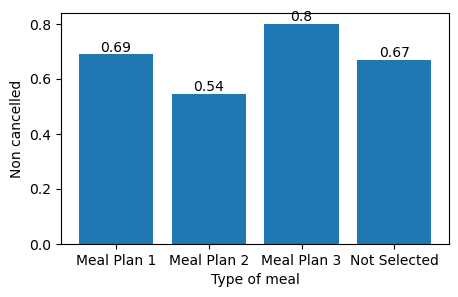

In [21]:
plt.figure(figsize=(5,3))
bars= plt.bar(meal_target['type of meal'], meal_target['non_cancelled_ratio'])
plt.xlabel("Type of meal")
plt.ylabel("Non cancelled")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

study its relation to the target.

In [22]:
def categoricalImportance(crossTab, alpha):
    stat, p, dof, expected = chi2_contingency(crossTab.values)
    if p <= alpha:
        return 'an important feature.'
    else:
        return 'not an important feature.'

In [23]:
# Function to parse dates with multiple formats
def parse_date(date_str):
    try:
        # Try to parse as YYYY-MM-DD
        return pd.to_datetime(date_str, format='%Y-%m-%d')
    except ValueError:
        try:
            # Try to parse as MM/DD/YYYY
            return pd.to_datetime(date_str, format='%m/%d/%Y')
        except ValueError:
            try:
                # Try to parse as MM-DD-YYYY
                return pd.to_datetime(date_str, format='%m-%d-%Y')
            except ValueError:
                return pd.NaT

In [24]:
def identify_date_format(date_str):
    for fmt, pattern in date_patterns.items():
        if pattern.fullmatch(date_str):
            return fmt
    return 'Unknown'

In [25]:
def anova_feature_selection(X, y, significance_level=0.05):
    selected_features = []
    p_values = []
    
    for feature in X.columns:
        groups = [X[feature][y == category] for category in y.unique()]
        f_statistic, p_value = f_oneway(*groups)
        p_values.append(p_value)
        
        if p_value < significance_level:
            selected_features.append(feature)
    
    return selected_features, p_values

In [26]:
df_cat.columns

Index(['type of meal', 'car parking space', 'room type', 'market segment type',
       'repeated', 'booking status'],
      dtype='object')

In [27]:
meal_target = pd.crosstab(df_cat['type of meal'], df_cat['booking status'])
print("Meal Target is " + categoricalImportance(meal_target, alpha= 0.1))

Meal Target is an important feature.


In [28]:
car_target = df_cat.groupby("car parking space")["booking status"].agg(["sum","count"]).reset_index()
car_target["non_cancelled_ratio"] = car_target["sum"] / car_target["count"]
car_target.drop(["sum","count"], axis=1, inplace= True)
car_target

car parking space  non_cancelled_ratio
0                  0             0.665112
1                  1             0.898577

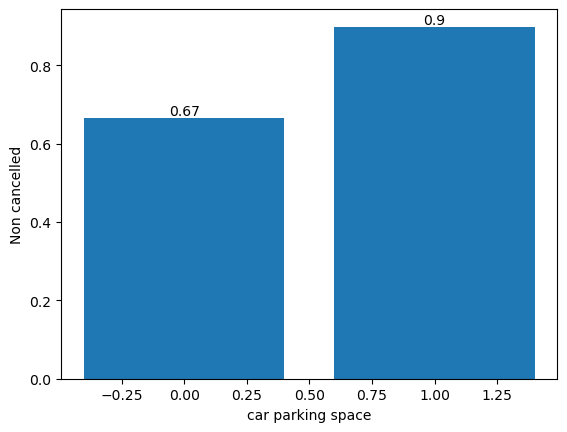

In [29]:
bars = plt.bar(car_target["car parking space"], car_target["non_cancelled_ratio"])
plt.xlabel("car parking space")
plt.ylabel("Non cancelled")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [30]:
car_target = pd.crosstab(df_cat['car parking space'], df_cat['booking status'])
print("car parking space is " + categoricalImportance(meal_target, alpha= 0.1))

car parking space is an important feature.


In [31]:
room_target = df_cat.groupby("room type")["booking status"].agg(["sum","count"]).reset_index()
room_target["non_cancelled_ratio"]  = room_target["sum"] / room_target["count"]
room_target.drop(["sum","count"], axis= 1, inplace= True)
room_target

room type  non_cancelled_ratio
0  Room_Type 1             0.677447
1  Room_Type 2             0.670520
2  Room_Type 3             0.714286
3  Room_Type 4             0.658525
4  Room_Type 5             0.728302
5  Room_Type 6             0.579710
6  Room_Type 7             0.772152

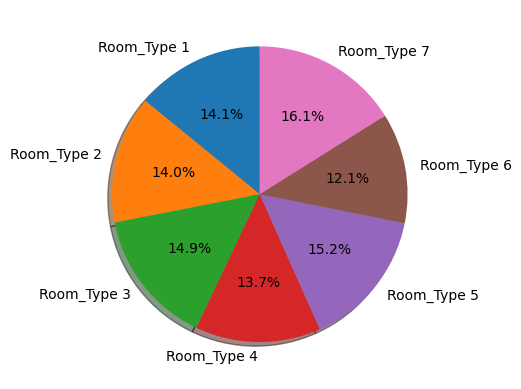

In [32]:
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(room_target['non_cancelled_ratio'], labels=room_target['room type'], autopct='%1.1f%%', startangle=90,shadow=True)

# Step 6: Display the pie chart
plt.show()

In [33]:
room_target = pd.crosstab(df_cat['room type'], df_cat['booking status'])
print("room type is " + categoricalImportance(meal_target, alpha= 0.1))

room type is an important feature.


In [34]:
df_cat_not_cancelled = df_cat[df_cat["booking status"] == 1]
df_cat_cancelled = df_cat[df_cat["booking status"] == 0]

In [35]:
pd.crosstab(df_cat_not_cancelled["room type"], df_cat_not_cancelled["type of meal"])

type of meal  Meal Plan 1  Meal Plan 2  Meal Plan 3  Not Selected
room type                                                        
Room_Type 1         14139         1569            0          3354
Room_Type 2           443           10            0            11
Room_Type 3             3            0            0             2
Room_Type 4          3769          185            1            35
Room_Type 5           180            5            0             8
Room_Type 6           511           28            0            21
Room_Type 7           116            2            3             1

In [36]:
pd.crosstab(df_cat_cancelled["room type"], df_cat_cancelled["type of meal"])

type of meal  Meal Plan 1  Meal Plan 2  Meal Plan 3  Not Selected
room type                                                        
Room_Type 1          6023         1366            1          1686
Room_Type 2           210            6            0            12
Room_Type 3             2            0            0             0
Room_Type 4          1981           88            0             0
Room_Type 5            62            9            0             1
Room_Type 6           367           38            0             1
Room_Type 7            36            0            0             0

In [37]:
pd.crosstab(df_cat_not_cancelled["room type"], df_cat_not_cancelled["market segment type"], normalize= 'columns')

market segment type  Aviation  Complementary  Corporate   Offline    Online
room type                                                                  
Room_Type 1          0.511364       0.631714   0.921536  0.904026  0.708472
Room_Type 2          0.000000       0.051151   0.001113  0.006642  0.026657
Room_Type 3          0.000000       0.005115   0.000556  0.000271  0.000000
Room_Type 4          0.488636       0.132992   0.043406  0.078081  0.219833
Room_Type 5          0.000000       0.043478   0.028937  0.007727  0.004545
Room_Type 6          0.000000       0.035806   0.001669  0.002711  0.035474
Room_Type 7          0.000000       0.099744   0.002782  0.000542  0.005019

In [38]:
pd.crosstab(df_cat_cancelled["room type"], df_cat_cancelled["market segment type"], normalize= 'index')

market segment type  Aviation  Corporate   Offline    Online
room type                                                   
Room_Type 1          0.001653   0.019502  0.339467  0.639379
Room_Type 2          0.000000   0.000000  0.035088  0.964912
Room_Type 3          0.000000   0.000000  0.000000  1.000000
Room_Type 4          0.010633   0.010150  0.017883  0.961334
Room_Type 5          0.000000   0.305556  0.333333  0.361111
Room_Type 6          0.000000   0.000000  0.007389  0.992611
Room_Type 7          0.000000   0.000000  0.027778  0.972222

In [39]:
market_target = df_cat.groupby('market segment type')['booking status'].agg(['sum','count']).reset_index()
market_target["non_cancelled_ratio"] = market_target["sum"] / market_target["count"]
market_target.drop(["sum","count"], axis= 1, inplace= True)
market_target

market segment type  non_cancelled_ratio
0            Aviation             0.704000
1       Complementary             1.000000
2           Corporate             0.890927
3             Offline             0.700503
4              Online             0.634899

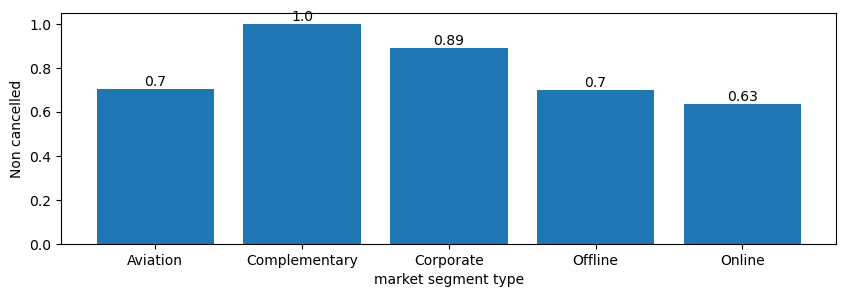

In [40]:
plt.figure(figsize=(10,3))
bars = plt.bar(market_target["market segment type"], market_target["non_cancelled_ratio"])
plt.xlabel("market segment type")
plt.ylabel("Non cancelled")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [41]:
market_target = pd.crosstab(df_cat['market segment type'], df_cat['booking status'])
print("market segment type is " + categoricalImportance(meal_target, alpha= 0.1))

market segment type is an important feature.


In [42]:
repeated_target = df_cat.groupby("repeated")["booking status"].agg(["sum","count"]).reset_index()
repeated_target["non_cancelled_ratio"] = repeated_target["sum"] / repeated_target["count"]
repeated_target.drop(["sum","count"], axis= 1, inplace= True)
repeated_target

repeated  non_cancelled_ratio
0         0             0.664178
1         1             0.982796

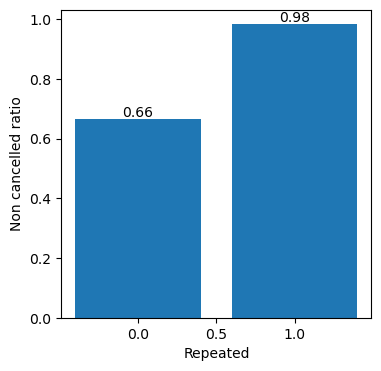

In [43]:
plt.figure(figsize=(4,4))
bars = plt.bar(repeated_target["repeated"], repeated_target["non_cancelled_ratio"])
plt.xlabel("Repeated")
plt.ylabel("Non cancelled ratio")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [44]:
repeated_target = pd.crosstab(df_cat['repeated'], df_cat['booking status'])
print("'repeated' is " + categoricalImportance(meal_target, alpha= 0.1))

'repeated' is an important feature.


In [45]:
df_cleaned_cat = pd.DataFrame()

#### Average Price vs some categories.

In [46]:
avg_price_room = data.groupby('room type')['average price '].agg(["mean","std"]).reset_index()
avg_price_room['room type'] = avg_price_room['room type'].astype('category')
avg_price_room['room type'] = avg_price_room['room type'].cat.codes
avg_price_room

room type        mean         std
0          0   95.917067   28.000899
1          1   87.848555   33.953959
2          2   73.678571   55.746210
3          3  125.285415   33.390781
4          4  123.733623   49.684916
5          5  182.212836   41.054018
6          6  155.198291  100.135655

In [47]:
avg_price_meal = data.groupby('type of meal')['average price '].agg(["mean","std"]).reset_index()
avg_price_meal['type of meal'] = avg_price_meal['type of meal'].astype('category')
avg_price_meal['type of meal'] = avg_price_meal['type of meal'].cat.codes
avg_price_meal

type of meal        mean        std
0             0  103.591571  35.983119
1             1  115.301476  37.400552
2             2   41.200000  92.126001
3             3   94.907414  24.595470

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

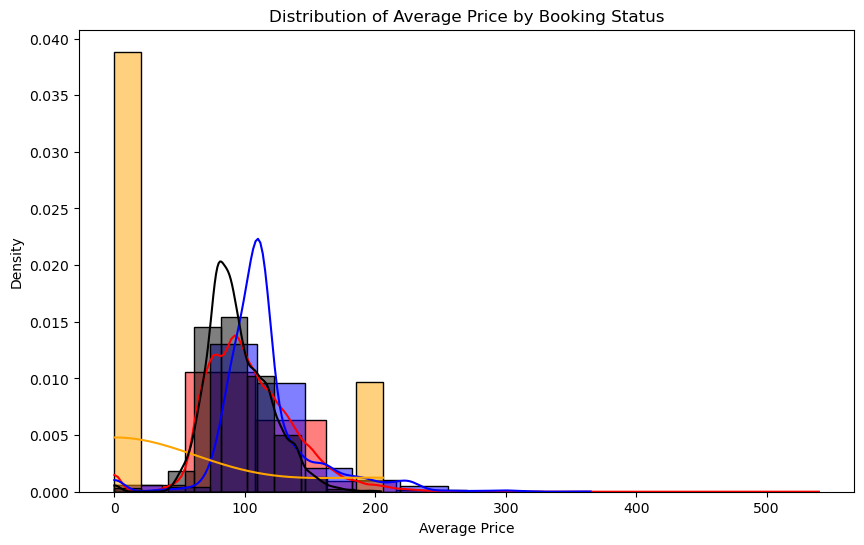

In [48]:
# Plot the distributions
plt.figure(figsize=(10,6))
colors = ['red','blue','orange']
for index, color in enumerate(colors):
    meal_label = f'Meal Plan {index + 1}'
    sns.histplot(data[data['type of meal'] == meal_label]['average price '], bins=10, color=color, label='Cancelled', kde=True, stat='density')

sns.histplot(data[data['type of meal'] == 'Not Selected']['average price '], bins=10, color='black', label='Cancelled', kde=True, stat='density')

plt.xlabel('Average Price')
plt.ylabel('Density')
plt.title('Distribution of Average Price by Booking Status')
plt.show()

We can see that room_type, meal_plan are not order categories and better be labeled as one hot encoding not label encoding.

In [49]:
df_cleaned_cat[['room type','type of meal',"market segment type",'repeated','car parking space']] = df_cat[['room type','type of meal',"market segment type",'repeated','car parking space']]
df_cleaned_cat = pd.get_dummies(df_cleaned_cat, columns=['room type','type of meal','market segment type'], dtype= int)
df_cleaned_cat

repeated  car parking space  room type_Room_Type 1  \
0             0                  0                      1   
1             0                  0                      1   
2             0                  0                      1   
3             0                  0                      1   
4             0                  0                      1   
...         ...                ...                    ...   
36280         0                  0                      1   
36281         0                  0                      1   
36282         0                  0                      0   
36283         0                  0                      1   
36284         0                  0                      0   

       room type_Room_Type 2  room type_Room_Type 3  room type_Room_Type 4  \
0                          0                      0                      0   
1                          0                      0                      0   
2                          0                      0                      0   
3                          0                      0                      0   
4                          0                      0                      0   
...                      ...                    ...                    ...   
36280                      0                      0                      0   
36281                      0                      0                      0   
36282                      0                      0                      1   
36283                      0                      0                      0   
36284                      0                      0                      1   

       room type_Room_Type 5  room type_Room_Type 6  room type_Room_Type 7  \
0                          0                      0                      0   
1                          0                      0                      0   
2                          0                      0                      0   
3                          0                      0                      0   
4                          0                      0                      0   
...                      ...                    ...                    ...   
36280                      0                      0                      0   
36281                      0                      0                      0   
36282                      0                      0                      0   
36283                      0                      0                      0   
36284                      0                      0                      0   

       type of meal_Meal Plan 1  type of meal_Meal Plan 2  \
0                             1                         0   
1                             0                         0   
2                             1                         0   
3                             1                         0   
4                             0                         0   
...                         ...                       ...   
36280                         0                         1   
36281                         1                         0   
36282                         1                         0   
36283                         1                         0   
36284                         1                         0   

       type of meal_Meal Plan 3  type of meal_Not Selected  \
0                             0                          0   
1                             0                          1   
2                             0                          0   
3                             0                          0   
4                             0                          1   
...                         ...                        ...   
36280                         0                          0   
36281                         0                          0   
36282                         0                          0   
36283                         0                

### Time-Series Analysis

In [50]:
df_time = data[["date of reservation","booking status"]]
df_time.rename(columns={"date of reservation" : "date", "booking status":"non_cancelled"}, inplace= True)
df_time

C:\Users\Acer\AppData\Local\Temp\ipykernel_22292\384924648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time.rename(columns={"date of reservation" : "date", "booking status":"non_cancelled"}, inplace= True)


date  non_cancelled
0       10/2/2015              1
1       11/6/2018              1
2       2/28/2018              0
3       5/20/2017              0
4       4/11/2018              0
...           ...            ...
36280   9/13/2018              0
36281  10/15/2017              1
36282  12/26/2018              1
36283    7/6/2018              1
36284  10/18/2018              1

[36285 rows x 2 columns]

In [51]:
# Regular expressions for different date patterns
date_patterns = {
    'YYYY-MM-DD': re.compile(r'\d{4}-\d{1,2}-\d{1,2}'),
    'MM/DD/YYYY': re.compile(r'\d{1,2}/\d{1,2}/\d{4}'),
    'MM-DD-YYYY': re.compile(r'\d{1,2}-\d{1,2}-\d{4}')
}

# Function to identify the date format
df_time['date_format'] = df_time['date'].apply(identify_date_format)
df_time.drop(['date_format'], axis= 1, inplace= True)
df_time

C:\Users\Acer\AppData\Local\Temp\ipykernel_22292\2523285085.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['date_format'] = df_time['date'].apply(identify_date_format)
C:\Users\Acer\AppData\Local\Temp\ipykernel_22292\2523285085.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time.drop(['date_format'], axis= 1, inplace= True)


date  non_cancelled
0       10/2/2015              1
1       11/6/2018              1
2       2/28/2018              0
3       5/20/2017              0
4       4/11/2018              0
...           ...            ...
36280   9/13/2018              0
36281  10/15/2017              1
36282  12/26/2018              1
36283    7/6/2018              1
36284  10/18/2018              1

[36285 rows x 2 columns]

In [52]:
# Parse the dates
df_time['parsed_date'] = df_time['date'].apply(parse_date)

# Extract year, month, day and convert to integers
df_time['year'] = df_time['parsed_date'].dt.year.fillna(0).astype(int)
df_time['month'] = df_time['parsed_date'].dt.month.fillna(0).astype(int)
df_time['day'] = df_time['parsed_date'].dt.day.fillna(0).astype(int)

df_time.drop(['date'], axis= 1, inplace= True)
df_time

C:\Users\Acer\AppData\Local\Temp\ipykernel_22292\3285383709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['parsed_date'] = df_time['date'].apply(parse_date)
C:\Users\Acer\AppData\Local\Temp\ipykernel_22292\3285383709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['year'] = df_time['parsed_date'].dt.year.fillna(0).astype(int)
C:\Users\Acer\AppData\Local\Temp\ipykernel_22292\3285383709.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


non_cancelled parsed_date  year  month  day
0                  1  2015-10-02  2015     10    2
1                  1  2018-11-06  2018     11    6
2                  0  2018-02-28  2018      2   28
3                  0  2017-05-20  2017      5   20
4                  0  2018-04-11  2018      4   11
...              ...         ...   ...    ...  ...
36280              0  2018-09-13  2018      9   13
36281              1  2017-10-15  2017     10   15
36282              1  2018-12-26  2018     12   26
36283              1  2018-07-06  2018      7    6
36284              1  2018-10-18  2018     10   18

[36285 rows x 5 columns]

In [53]:
df_time_year = df_time.groupby('year')['non_cancelled'].agg(['sum','count']).reset_index()
df_time_year['non_cancelled_ratio'] = df_time_year['sum'] / df_time_year['count']
df_time_year = df_time_year[df_time_year['year'] > 0]
df_time_year

year    sum  count  non_cancelled_ratio
1  2015      1      1             1.000000
2  2016      0      1             0.000000
3  2017   5554   6516             0.852363
4  2018  18811  29730             0.632728

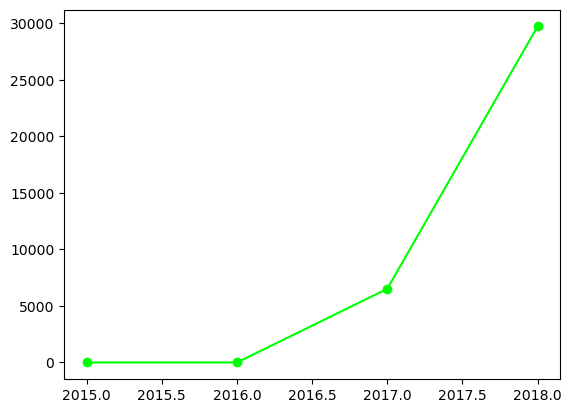

In [54]:
plt.plot(df_time_year['year'], df_time_year['count'], marker='o', color='lime')

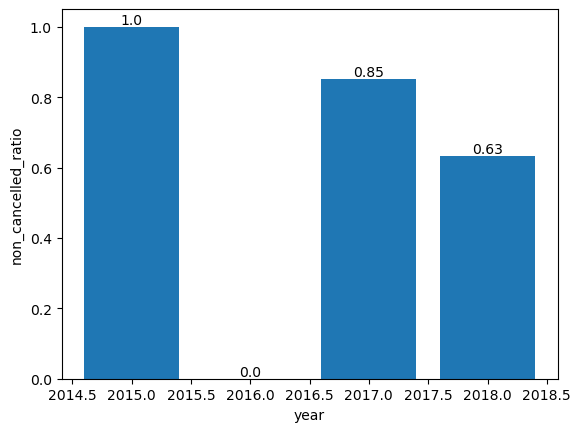

In [55]:
bars= plt.bar(df_time_year['year'], df_time_year['non_cancelled_ratio'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel("year")
plt.ylabel("non_cancelled_ratio")
plt.show()

### Notes: 
<ul>
<li>
    2015 has just one transaction which is not okay.
</li>
<li>
    There are many 0 year which means there are many garbage values in the date, like 2018 not being a leap year and it is written that februrary has 29 days which is wrong.
</li>   


In [56]:
df_time_month = df_time.groupby('month')['non_cancelled'].agg(['sum','count']).reset_index()
df_time_month['non_cancelled_ratio'] = df_time_month['sum'] / df_time_month['count']
df_time_month = df_time_month[df_time_month['month'] > 0]
df_time_month

month   sum  count  non_cancelled_ratio
1       1   990   1014             0.976331
2       2  1244   1668             0.745803
3       3  1658   2358             0.703138
4       4  1741   2737             0.636098
5       5  1650   2599             0.634860
6       6  1912   3203             0.596940
7       7  1607   2921             0.550154
8       8  2325   3813             0.609756
9       9  3073   4612             0.666305
10     10  3440   5320             0.646617
11     11  2106   2981             0.706474
12     12  2620   3022             0.866976

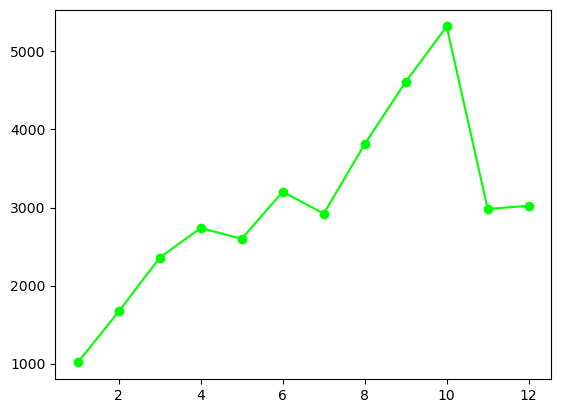

In [57]:
plt.plot(df_time_month['month'], df_time_month['count'], marker='o', color='lime')

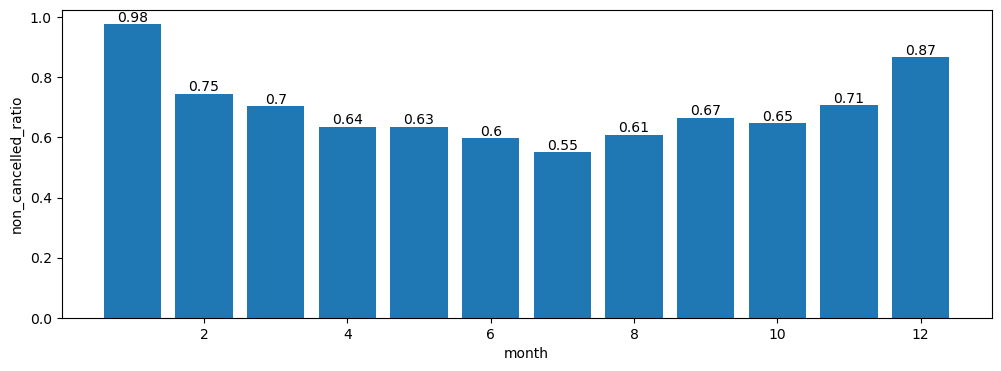

In [58]:
plt.figure(figsize=(12,4))
bars= plt.bar(df_time_month['month'], df_time_month['non_cancelled_ratio'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel("month")
plt.ylabel("non_cancelled_ratio")
plt.show()

### Month Notes:
<ul>
    <li>
        The graphs shows that the total transactions are low in winter and high in summer which is logical due to summer vacation seson.
    </li>
    <li>
        However, during winter the non-cancellation ratio is high which may indicate that these are mainly business travels with high rate of non-cancellation.
    </li>
</ul>

In [59]:
df_time_days = df_time.groupby('day')['non_cancelled'].agg(['sum','count']).reset_index()
df_time_days['non_cancelled_ratio'] = df_time_days['sum'] / df_time_days['count']
df_time_days = df_time_days[df_time_days['day'] > 0]
df_time_days.head()

day   sum  count  non_cancelled_ratio
1    1   668   1133             0.589585
2    2  1024   1332             0.768769
3    3   695   1098             0.632969
4    4   853   1327             0.642803
5    5   826   1154             0.715771

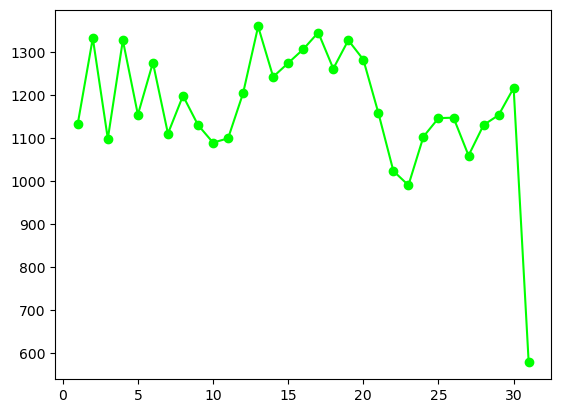

In [60]:
plt.plot(df_time_days['day'], df_time_days['count'], marker='o', color='lime')

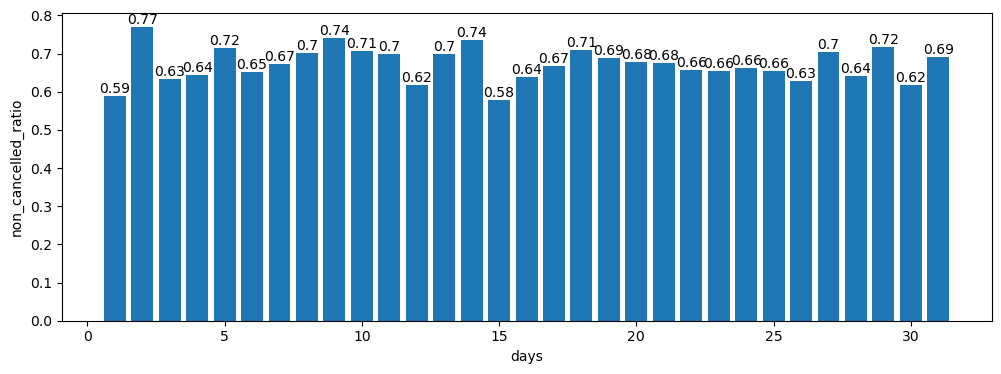

In [61]:
plt.figure(figsize=(12,4))
bars= plt.bar(df_time_days['day'], df_time_days['non_cancelled_ratio'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel("days")
plt.ylabel("non_cancelled_ratio")
plt.show()

### Day notes:
No significant observations from the day. (note that 31 is low because not all months have 31 days)

#### 2017 and 2018 alone

In [62]:
df_time_2017 = df_time[df_time['year'] == 2017]
df_time_month_2017 = df_time_2017.groupby('month')['non_cancelled'].agg(['sum','count']).reset_index()
df_time_month_2017['non_cancelled_ratio'] = df_time_month_2017['sum'] / df_time_month_2017['count']
df_time_month_2017

month   sum  count  non_cancelled_ratio
0      5     0      1             0.000000
1      7   120    363             0.330579
2      8   829   1014             0.817554
3      9  1467   1649             0.889630
4     10  1612   1914             0.842215
5     11   620    647             0.958269
6     12   906    928             0.976293

In [63]:
df_time_2018 = df_time[df_time['year'] == 2018]
df_time_month_2018 = df_time_2018.groupby('month')['non_cancelled'].agg(['sum','count']).reset_index()
df_time_month_2018['non_cancelled_ratio'] = df_time_month_2018['sum'] / df_time_month_2018['count']
df_time_month_2018

month   sum  count  non_cancelled_ratio
0       1   990   1014             0.976331
1       2  1244   1668             0.745803
2       3  1658   2358             0.703138
3       4  1741   2737             0.636098
4       5  1650   2598             0.635104
5       6  1912   3203             0.596940
6       7  1487   2558             0.581314
7       8  1496   2799             0.534477
8       9  1606   2962             0.542201
9      10  1827   3405             0.536564
10     11  1486   2334             0.636675
11     12  1714   2094             0.818529

It seems like the bulk of the data is between July 2017 to the end of 2018

In [64]:
df_time_main = df_time[df_time['parsed_date'] > '2017-07-01']
df_time_main = df_time_main.groupby('parsed_date')['non_cancelled'].agg(['sum','count']).reset_index()
df_time_main['non_cancelled_ratio'] = df_time_main['sum'] / df_time_main['count']
df_time_main

parsed_date  sum  count  non_cancelled_ratio
0    2017-07-02    0      5             0.000000
1    2017-07-03    1      3             0.333333
2    2017-07-04    0      4             0.000000
3    2017-07-05    0      3             0.000000
4    2017-07-06    0     10             0.000000
..          ...  ...    ...                  ...
543  2018-12-27  122    147             0.829932
544  2018-12-28   63     84             0.750000
545  2018-12-29   83    105             0.790476
546  2018-12-30   74     93             0.795699
547  2018-12-31   30     40             0.750000

[548 rows x 4 columns]

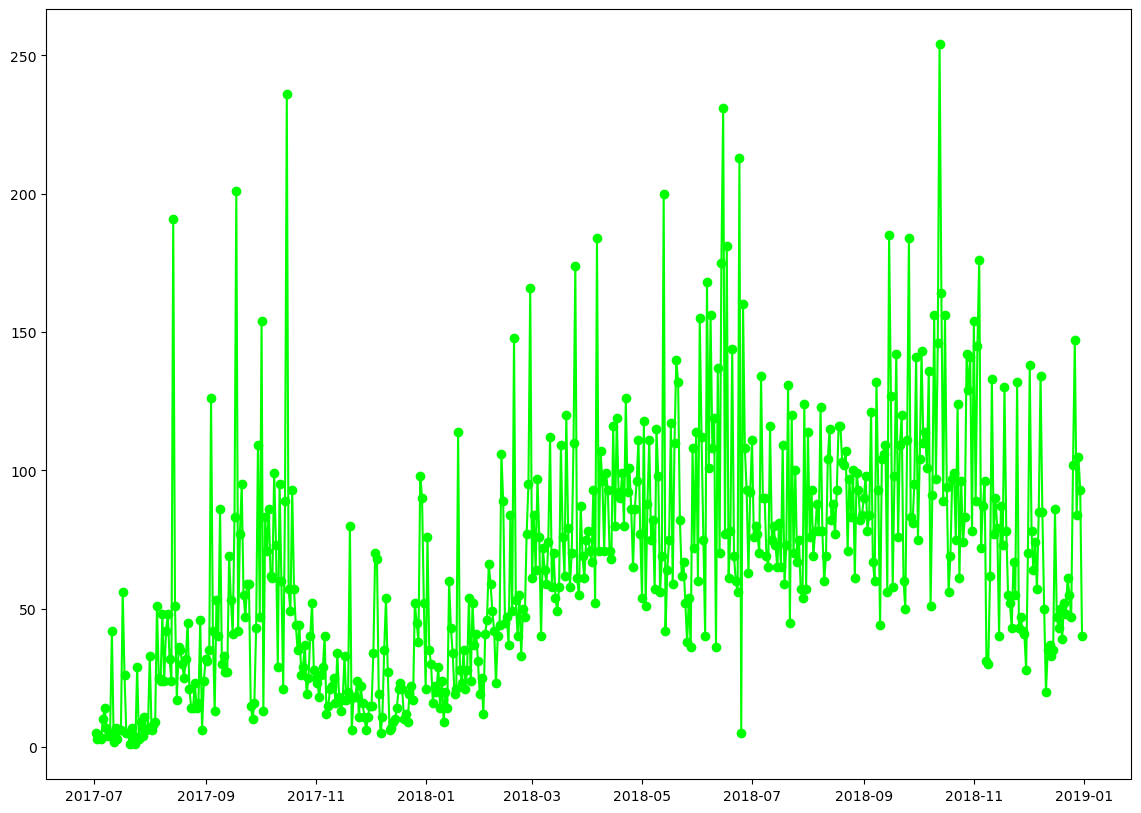

In [65]:
plt.figure(figsize=(14,10))
plt.plot(df_time_main['parsed_date'], df_time_main['count'], marker='o', color='lime')

Let's smooth this curve using moving average.

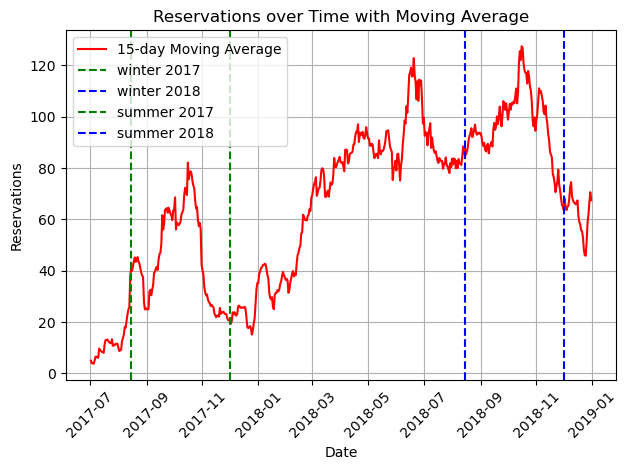

In [66]:
window_size = 15
df_time_main['moving_avg'] = df_time_main['count'].rolling(window= window_size, min_periods=1).mean()
plt.plot(df_time_main['parsed_date'], df_time_main['moving_avg'], label=f'{window_size}-day Moving Average', linestyle='-', color='r')
plt.axvline(x=pd.Timestamp('2017-12-01'), color='g', linestyle='--', label='winter 2017')
plt.axvline(x=pd.Timestamp('2018-12-01'), color='b', linestyle='--', label='winter 2018')
plt.axvline(x=pd.Timestamp('2017-08-15'), color='g', linestyle='--', label='summer 2017')
plt.axvline(x=pd.Timestamp('2018-08-15'), color='b', linestyle='--', label='summer 2018')
plt.title('Reservations over Time with Moving Average')
plt.xlabel('Date')
plt.ylabel('Reservations')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Notes:
<ul>
    <li>
        The graphs show significant improvement from 2017 to 2018 in terms of reservations.
    </li>
    <li>
        Summer as noted above is typically higher than winter.
    </li>
</ul>

In [67]:
df_time_cleaned = pd.DataFrame()
df_time_cleaned['year'] = df_time['year']
df_time_cleaned['month'] = df_time['month']
df_time_cleaned['day'] = df_time['day']
df_time_cleaned['arrived'] = df_time['non_cancelled']
df_time_cleaned

year  month  day  arrived
0      2015     10    2        1
1      2018     11    6        1
2      2018      2   28        0
3      2017      5   20        0
4      2018      4   11        0
...     ...    ...  ...      ...
36280  2018      9   13        0
36281  2017     10   15        1
36282  2018     12   26        1
36283  2018      7    6        1
36284  2018     10   18        1

[36285 rows x 4 columns]

### Numerical Data

In [68]:
df_numeric = data[['number of adults','number of children','number of weekend nights','number of week nights','lead time',
                  'P-C','P-not-C','average price ','special requests','booking status']]
df_numeric.rename(columns={'average price ':'average price'}, inplace= True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_22292\981297889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.rename(columns={'average price ':'average price'}, inplace= True)


In [69]:
df_numeric.describe()

number of adults  number of children  number of weekend nights  \
count      36285.000000        36285.000000              36285.000000   
mean           1.844839            0.105360                  0.810693   
std            0.518813            0.402704                  0.870590   
min            0.000000            0.000000                  0.000000   
25%            2.000000            0.000000                  0.000000   
50%            2.000000            0.000000                  1.000000   
75%            2.000000            0.000000                  2.000000   
max            4.000000           10.000000                  7.000000   

       number of week nights     lead time           P-C       P-not-C  \
count           36285.000000  36285.000000  36285.000000  36285.000000   
mean                2.204602     85.239851      0.023343      0.153369   
std                 1.410946     85.938796      0.368281      1.753931   
min                 0.000000      0.000000      0.000000      0.000000   
25%                 1.000000     17.000000      0.000000      0.000000   
50%                 2.000000     57.000000      0.000000      0.000000   
75%                 3.000000    126.000000      0.000000      0.000000   
max                17.000000    443.000000     13.000000     58.000000   

       average price  special requests  booking status  
count   36285.000000      36285.000000    36285.000000  
mean      103.421636          0.619733        0.672344  
std        35.086469          0.786262        0.469365  
min         0.000000          0.000000        0.000000  
25%        80.300000          0.000000        0.000000  
50%        99.450000          0.000000        1.000000  
75%       120.000000          1.000000        1.000000  
max       540.000000          5.000000        1.000000

In [70]:
df_numeric.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'lead time', 'P-C', 'P-not-C', 'average price',
       'special requests', 'booking status'],
      dtype='object')

In [71]:
df_numeric_not_c = df_numeric[df_numeric['booking status'] == 1]
df_numeric_c = df_numeric[df_numeric['booking status'] == 0]

### Detecting Outliers

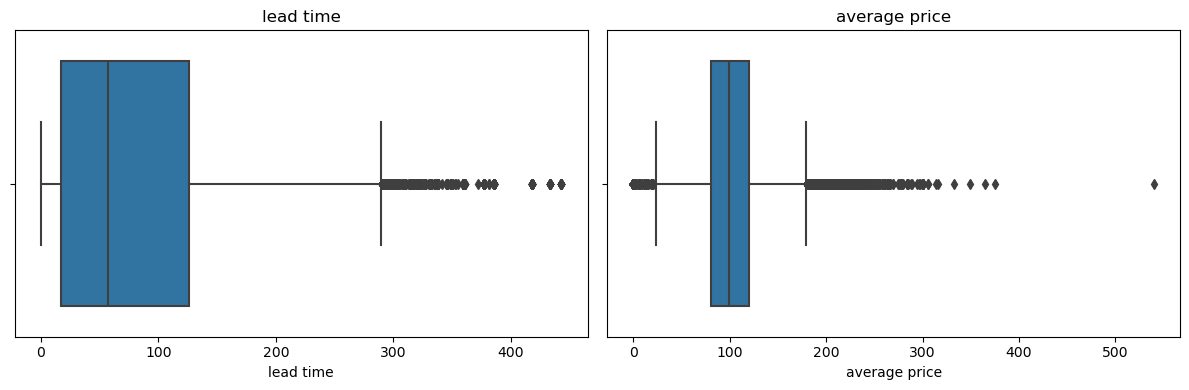

In [72]:
columns = ['lead time', 'average price']
fig, ax = plt.subplots(1,2,figsize=(12, 4))

ax= ax.flatten()
for i, column in enumerate(columns):
    sns.boxplot(x=df_numeric[column], ax=ax[i])
    ax[i].set_title(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

[None]

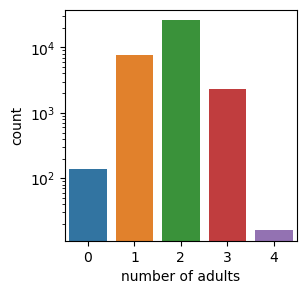

In [73]:
plt.figure(figsize=(3,3))
s = sns.countplot(x="number of adults", data= df_numeric)
s.set(yscale= 'log')

In [74]:
adults_target = df_numeric.groupby('number of adults')['booking status'].agg(["sum","count"]).reset_index()
adults_target['non_cancelled_ratio'] = adults_target["sum"] / adults_target["count"]
adults_target.drop(["sum"],axis= 1, inplace= True)
adults_target

number of adults  count  non_cancelled_ratio
0                 0    139             0.683453
1                 1   7702             0.758634
2                 2  26110             0.650709
3                 3   2318             0.627696
4                 4     16             0.812500

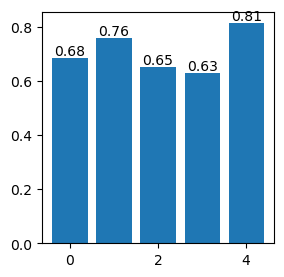

In [75]:
plt.figure(figsize=(3,3))
bars= plt.bar(adults_target["number of adults"], adults_target["non_cancelled_ratio"])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

[None]

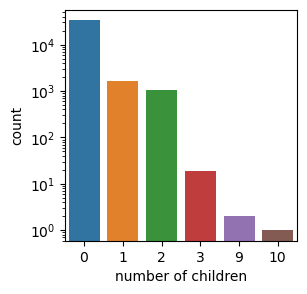

In [76]:
plt.figure(figsize=(3,3))
s = sns.countplot(x="number of children", data= df_numeric)
s.set(yscale= 'log')

In [77]:
children_target = df_numeric.groupby('number of children')['booking status'].agg(["sum","count"]).reset_index()
children_target['non_cancelled_ratio'] = children_target["sum"] / children_target["count"]
children_target.drop(["sum"],axis= 1, inplace= True)
children_target

number of children  count  non_cancelled_ratio
0                   0  33583             0.675878
1                   1   1622             0.666461
2                   2   1058             0.568053
3                   3     19             0.736842
4                   9      2             0.500000
5                  10      1             1.000000

<br>only 1 row for each 9 and 10, so, outliers</br>

In [78]:
df_numeric["total number"] = df_numeric["number of adults"] + df_numeric["number of children"]
total_target = df_numeric.groupby('total number')['booking status'].agg(["sum","count"]).reset_index()
total_target['non_cancelled_ratio'] = total_target["sum"] / total_target["count"]
total_target.drop(["sum"],axis= 1, inplace= True)
total_target

C:\Users\Acer\AppData\Local\Temp\ipykernel_22292\3508089898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric["total number"] = df_numeric["number of adults"] + df_numeric["number of children"]


total number  count  non_cancelled_ratio
0             1   7556             0.760191
1             2  23946             0.654222
2             3   3853             0.638464
3             4    912             0.563596
4             5     15             0.666667
5            10      1             1.000000
6            11      1             0.000000
7            12      1             1.000000

In [79]:
total_target_2 = total_target.drop(total_target[total_target["total number"] > 5].index)
total_target_2

total number  count  non_cancelled_ratio
0             1   7556             0.760191
1             2  23946             0.654222
2             3   3853             0.638464
3             4    912             0.563596
4             5     15             0.666667

[None]

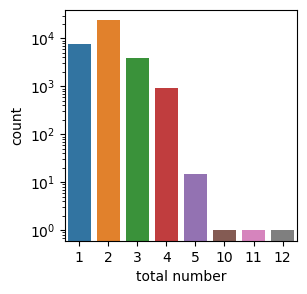

In [80]:
plt.figure(figsize=(3,3))
s = sns.countplot(x="total number", data= df_numeric)
s.set(yscale= 'log')

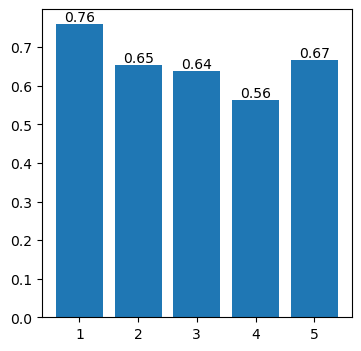

In [81]:
plt.figure(figsize=(4,4))
bars= plt.bar(total_target_2["total number"], total_target_2["non_cancelled_ratio"])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

<p> A new feature to be added "total_number" </p>

In [82]:
nights_target = df_numeric.groupby("number of week nights")["booking status"].agg(["sum","count"]).reset_index()
nights_target["non_cancelled_ratio"] = nights_target["sum"] / nights_target["count"]
nights_target.drop(["sum"],axis= 1, inplace= True)
nights_target

number of week nights  count  non_cancelled_ratio
0                       0   2387             0.715543
1                       1   9488             0.728921
2                       2  11447             0.650563
3                       3   7842             0.671640
4                       4   2992             0.617981
5                       5   1616             0.608911
6                       6    189             0.534392
7                       7    113             0.539823
8                       8     62             0.483871
9                       9     34             0.382353
10                     10     62             0.145161
11                     11     17             0.176471
12                     12      9             0.222222
13                     13      5             0.000000
14                     14      7             0.428571
15                     15     10             0.200000
16                     16      2             0.000000
17                     17      3             0.333333

[None]

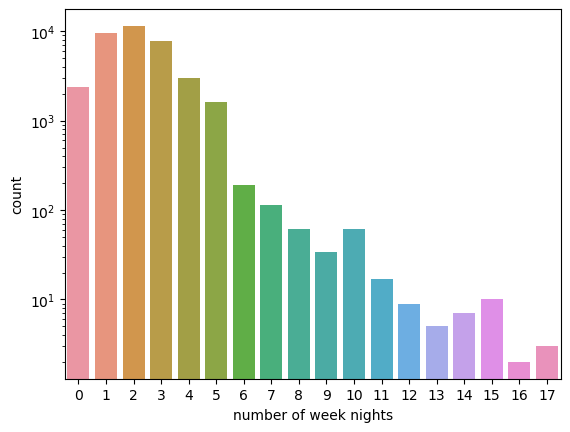

In [83]:
s = sns.countplot(x= "number of week nights", data= df_numeric)
s.set(yscale= 'log')

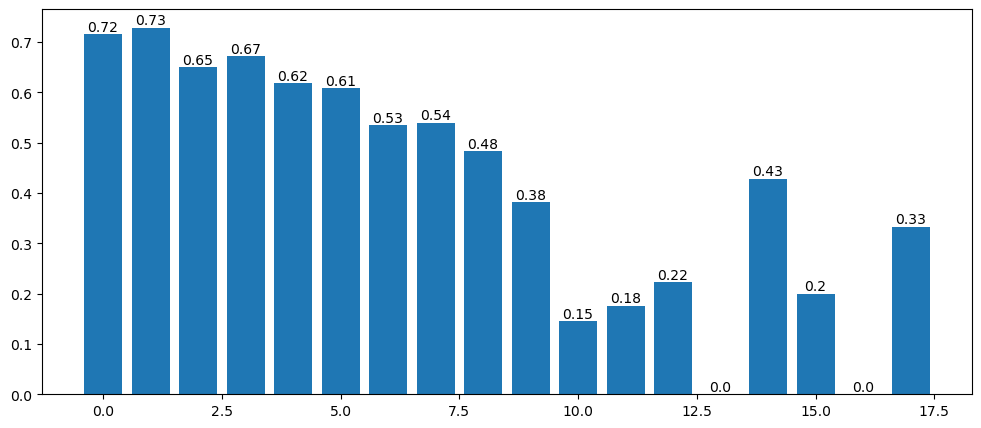

In [84]:
plt.figure(figsize=(12,5))
bars =plt.bar(nights_target["number of week nights"], nights_target["non_cancelled_ratio"])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [85]:
weekend_target = df_numeric.groupby("number of weekend nights")["booking status"].agg(["sum","count"]).reset_index()
weekend_target["non_cancelled_ratio"] = weekend_target["sum"] / weekend_target["count"]
weekend_target.drop(["sum"],axis= 1, inplace= True)
weekend_target

number of weekend nights  count  non_cancelled_ratio
0                         0  16876             0.698092
1                         1  10000             0.656600
2                         2   9072             0.652006
3                         3    153             0.516340
4                         4    129             0.356589
5                         5     34             0.147059
6                         6     20             0.200000
7                         7      1             0.000000

<p> 7 is an outlier </p>

[None]

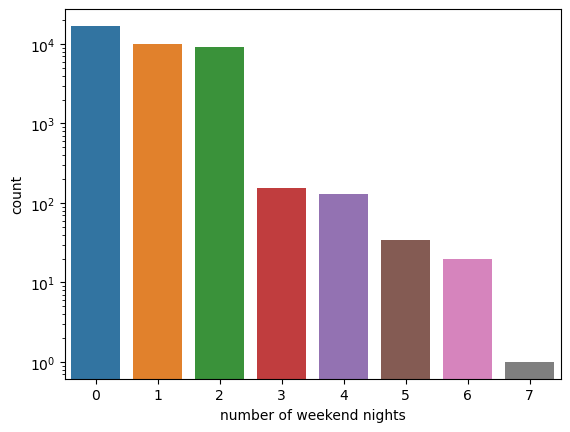

In [86]:
s = sns.countplot(x= "number of weekend nights", data= df_numeric)
s.set(yscale= 'log')

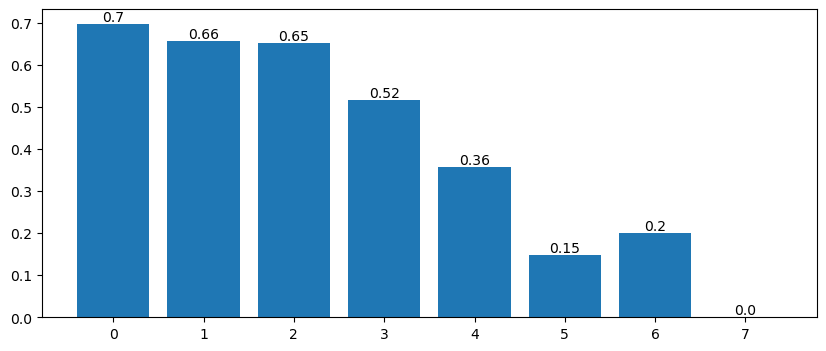

In [87]:
plt.figure(figsize=(10,4))
bars =plt.bar(weekend_target["number of weekend nights"], weekend_target["non_cancelled_ratio"])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [88]:
df_numeric["total number of nights"] = df_numeric["number of week nights"] + df_numeric["number of weekend nights"]

C:\Users\Acer\AppData\Local\Temp\ipykernel_22292\2490042862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric["total number of nights"] = df_numeric["number of week nights"] + df_numeric["number of weekend nights"]


In [89]:
number_target = df_numeric.groupby("total number of nights")["booking status"].agg(["sum","count"]).reset_index()
number_target["non_cancelled_ratio"] = number_target["sum"] / number_target["count"]
number_target.drop(["sum"],axis= 1, inplace= True)
number_target

total number of nights  count  non_cancelled_ratio
0                        0     78             0.974359
1                        1   6604             0.778013
2                        2   8474             0.657659
3                        3  10053             0.643191
4                        4   5897             0.670680
5                        5   2591             0.682362
6                        6   1031             0.548982
7                        7    974             0.606776
8                        8    179             0.558659
9                        9    111             0.522523
10                      10    109             0.467890
11                      11     39             0.615385
12                      12     24             0.375000
13                      13     18             0.166667
14                      14     32             0.156250
15                      15     31             0.161290
16                      16      6             0.166667
17                      17      5             0.200000
18                      18      3             0.000000
19                      19      6             0.166667
20                      20     11             0.272727
21                      21      4             0.250000
22                      22      2             0.000000
23                      23      2             0.500000
24                      24      1             0.000000

[None]

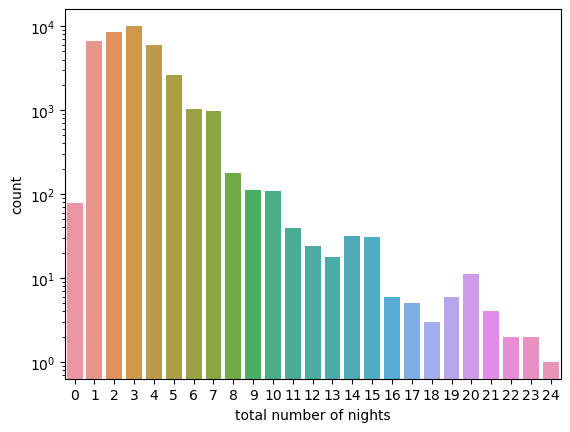

In [90]:
s = sns.countplot(x= "total number of nights", data= df_numeric)
s.set(yscale= 'log')

In [91]:
number_target

total number of nights  count  non_cancelled_ratio
0                        0     78             0.974359
1                        1   6604             0.778013
2                        2   8474             0.657659
3                        3  10053             0.643191
4                        4   5897             0.670680
5                        5   2591             0.682362
6                        6   1031             0.548982
7                        7    974             0.606776
8                        8    179             0.558659
9                        9    111             0.522523
10                      10    109             0.467890
11                      11     39             0.615385
12                      12     24             0.375000
13                      13     18             0.166667
14                      14     32             0.156250
15                      15     31             0.161290
16                      16      6             0.166667
17                      17      5             0.200000
18                      18      3             0.000000
19                      19      6             0.166667
20                      20     11             0.272727
21                      21      4             0.250000
22                      22      2             0.000000
23                      23      2             0.500000
24                      24      1             0.000000

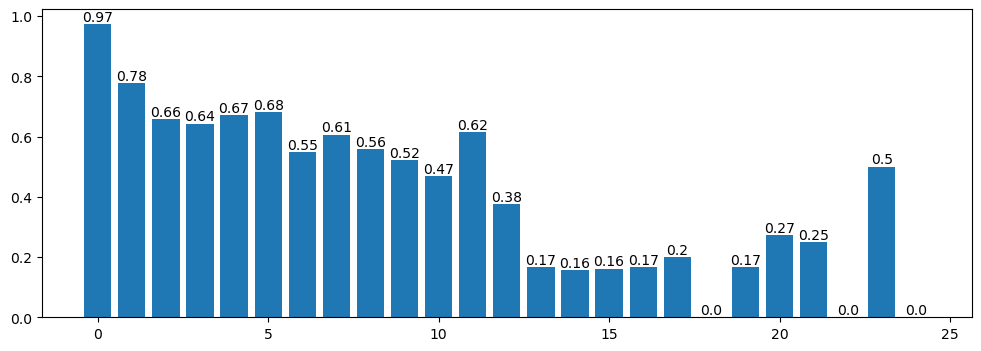

In [92]:
plt.figure(figsize=(12,4))
bars =plt.bar(number_target["total number of nights"], number_target["non_cancelled_ratio"])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [93]:
df_numeric.rename({"total number" : "total number of people"}, axis=1, inplace= True)
df_numeric

C:\Users\Acer\AppData\Local\Temp\ipykernel_22292\4215812707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.rename({"total number" : "total number of people"}, axis=1, inplace= True)


number of adults  number of children  number of weekend nights  \
0                     1                   1                         2   
1                     1                   0                         1   
2                     2                   1                         1   
3                     1                   0                         0   
4                     1                   0                         1   
...                 ...                 ...                       ...   
36280                 2                   0                         0   
36281                 2                   0                         1   
36282                 2                   0                         1   
36283                 3                   0                         0   
36284                 2                   0                         0   

       number of week nights  lead time  P-C  P-not-C  average price  \
0                          5        224    0        0          88.00   
1                          3          5    0        0         106.68   
2                          3          1    0        0          50.00   
3                          2        211    0        0         100.00   
4                          2         48    0        0          77.00   
...                      ...        ...  ...      ...            ...   
36280                      2        346    0        0         115.00   
36281                      3         34    0        0         107.55   
36282                      3         83    0        0         105.61   
36283                      4        121    0        0          96.90   
36284                      5         44    0        0         133.44   

       special requests  booking status  total number of people  \
0                     0               1                       2   
1                     1               1                       1   
2                     0               0                       3   
3                     1               0                       1   
4                     0               0                       1   
...                 ...             ...                     ...   
36280                 1               0                       2   
36281                 1               1                       2   
36282                 1               1                       2   
36283                 1               1                       3   
36284                 3               1                       2   

       total number of nights  
0                           7  
1                           4  
2                           4  
3                           2  
4                           3  
...                       ...  
36280                       2  
36281                       4  
36282                       4  
36283                       4  
36284                       5  

[36285 rows x 12 columns]

In [94]:
price_target = pd.DataFrame({"non-cancelled" : [np.mean(df_numeric_not_c["average price"])], 
                             "cancelled" : [np.mean(df_numeric_c["average price"])]})

price_target.loc[len(price_target)] = [np.std(df_numeric_not_c["average price"]), np.std(df_numeric_c["average price"])]
price_target

non-cancelled   cancelled
0      99.932994  110.580263
1      35.867813   32.264157

d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


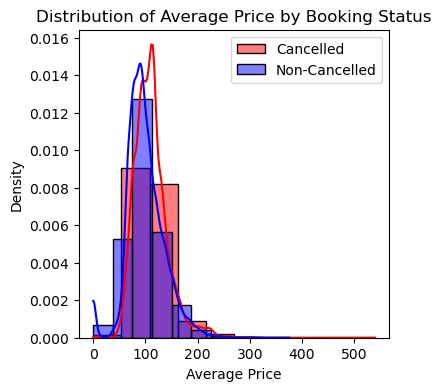

In [95]:
# Plot the distributions
plt.figure(figsize=(4,4))
sns.histplot(df_numeric_c['average price'], bins=10, color='red', label='Cancelled', kde=True, stat='density')
sns.histplot(df_numeric_not_c['average price'], bins=10, color='blue', label='Non-Cancelled', kde=True, stat='density')
plt.xlabel('Average Price')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.title('Distribution of Average Price by Booking Status')
plt.show()

<p>No significant difference in distributions. Maybe not a strong feature</p>

In [96]:
requests_target = df_numeric.groupby("special requests")["booking status"].agg(["sum","count"]).reset_index()
requests_target["non_cancelled_ratio"] = requests_target["sum"] / requests_target["count"]
requests_target.drop(["sum"],axis= 1, inplace= True)
requests_target

special requests  count  non_cancelled_ratio
0                 0  19780             0.567897
1                 1  11379             0.762281
2                 2   4364             0.854033
3                 3    676             1.000000
4                 4     78             1.000000
5                 5      8             1.000000

[None]

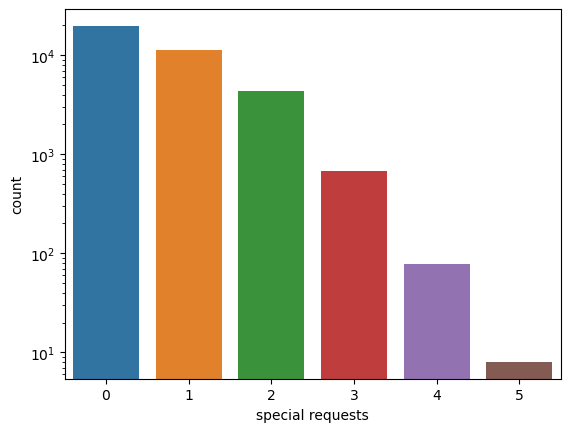

In [97]:
s = sns.countplot(x= "special requests", data= df_numeric)
s.set(yscale= 'log')

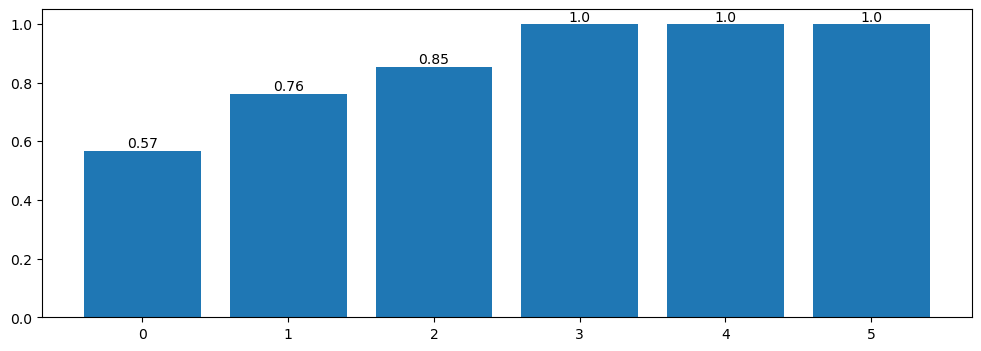

In [98]:
plt.figure(figsize=(12,4))
bars =plt.bar(requests_target["special requests"], requests_target["non_cancelled_ratio"])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [99]:
selected_features, p_values = anova_feature_selection(df_numeric.drop(['booking status'], axis= 1), data['booking status'],significance_level= 0.1)
selected_features

['number of adults',
 'number of children',
 'number of weekend nights',
 'number of week nights',
 'lead time',
 'P-C',
 'P-not-C',
 'average price',
 'special requests',
 'total number of people',
 'total number of nights']

In [100]:
df_numeric_cleaned = pd.DataFrame()
df_numeric_cleaned[['lead_time'	,'P-C','P-not-C','average_price','special_requests']] = df_numeric[['lead time','P-C','P-not-C','average price','special requests']]
df_numeric_cleaned[['num_adults','num_children','total_num','num_weekend','num_week','total_nights']] = df_numeric[['number of adults','number of children','total number of people','number of weekend nights','number of week nights','total number of nights']]
df_numeric_cleaned

lead_time  P-C  P-not-C  average_price  special_requests  num_adults  \
0            224    0        0          88.00                 0           1   
1              5    0        0         106.68                 1           1   
2              1    0        0          50.00                 0           2   
3            211    0        0         100.00                 1           1   
4             48    0        0          77.00                 0           1   
...          ...  ...      ...            ...               ...         ...   
36280        346    0        0         115.00                 1           2   
36281         34    0        0         107.55                 1           2   
36282         83    0        0         105.61                 1           2   
36283        121    0        0          96.90                 1           3   
36284         44    0        0         133.44                 3           2   

       num_children  total_num  num_weekend  num_week  total_nights  
0                 1          2            2         5             7  
1                 0          1            1         3             4  
2                 1          3            1         3             4  
3                 0          1            0         2             2  
4                 0          1            1         2             3  
...             ...        ...          ...       ...           ...  
36280             0          2            0         2             2  
36281             0          2            1         3             4  
36282             0          2            1         3             4  
36283             0          3            0         4             4  
36284             0          2            0         5             5  

[36285 rows x 11 columns]

### Preparation

In [101]:
target = data['booking status'].reset_index().drop(['index'], axis= 1).rename(columns={'booking status': 'arrived'})
target

arrived
0            1
1            1
2            0
3            0
4            0
...        ...
36280        0
36281        1
36282        1
36283        1
36284        1

[36285 rows x 1 columns]

In [102]:
data_cleaned = pd.concat([df_cleaned_cat, df_numeric_cleaned, df_time_cleaned.drop(['arrived'],axis=1), target], axis= 1)
data_cleaned

repeated  car parking space  room type_Room_Type 1  \
0             0                  0                      1   
1             0                  0                      1   
2             0                  0                      1   
3             0                  0                      1   
4             0                  0                      1   
...         ...                ...                    ...   
36280         0                  0                      1   
36281         0                  0                      1   
36282         0                  0                      0   
36283         0                  0                      1   
36284         0                  0                      0   

       room type_Room_Type 2  room type_Room_Type 3  room type_Room_Type 4  \
0                          0                      0                      0   
1                          0                      0                      0   
2                          0                      0                      0   
3                          0                      0                      0   
4                          0                      0                      0   
...                      ...                    ...                    ...   
36280                      0                      0                      0   
36281                      0                      0                      0   
36282                      0                      0                      1   
36283                      0                      0                      0   
36284                      0                      0                      1   

       room type_Room_Type 5  room type_Room_Type 6  room type_Room_Type 7  \
0                          0                      0                      0   
1                          0                      0                      0   
2                          0                      0                      0   
3                          0                      0                      0   
4                          0                      0                      0   
...                      ...                    ...                    ...   
36280                      0                      0                      0   
36281                      0                      0                      0   
36282                      0                      0                      0   
36283                      0                      0                      0   
36284                      0                      0                      0   

       type of meal_Meal Plan 1  ...  num_adults  num_children  total_num  \
0                             1  ...           1             1          2   
1                             0  ...           1             0          1   
2                             1  ...           2             1          3   
3                             1  ...           1             0          1   
4                             0  ...           1             0          1   
...                         ...  ...         ...           ...        ...   
36280                         0  ...           2             0          2   
36281                         1  ...           2             0          2   
36282                         1  ...           2             0          2   
36283                         1  ...           3             0          3   
36284                         1  ...           2             0          2   

       num_weekend  num_week  total_nights  year  month  day  arrived  
0                2         5             7  2015     10    2        1  
1                1         3             4  2018     11    6        1  
2                1         3             4  2018      2   28        0  
3                0         2             2  2017      5   20        0  
4                1         2             3  2018      4   11        0  
...            ...       ...           ... 

## Baseline
Just establishing a baseline on the model before any cleaning.

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, KFold, GridSearchCV

### First LogisticRegression Model
without new features added.

In [104]:
X = data_cleaned.drop(['arrived'],axis= 1).values
y = data_cleaned['arrived'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state= 42)
sec_logreg = LogisticRegression()
sec_logreg.fit(X_train, y_train)
y_pred = sec_logreg.predict(X_test)
y_pred_probs = sec_logreg.predict_proba(X_test)[:, 1]

d:\AnaConda\Here\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
print("Roc score: ", roc_auc_score(y_score= y_pred_probs, y_true= y_test))
print(classification_report(y_pred= y_pred, y_true= y_test))
print(confusion_matrix(y_pred= y_pred, y_true= y_test))

Roc score:  0.8531357955952064
              precision    recall  f1-score   support

           0       0.75      0.59      0.66      3594
           1       0.82      0.90      0.86      7292

    accuracy                           0.80     10886
   macro avg       0.78      0.75      0.76     10886
weighted avg       0.79      0.80      0.79     10886

[[2129 1465]
 [ 720 6572]]


In [106]:
y_pred_train = sec_logreg.predict(X_train)
y_pred_probs_train = sec_logreg.predict_proba(X_train)[:, 1]
print("Roc score: ", roc_auc_score(y_score= y_pred_probs_train, y_true= y_train))
print(classification_report(y_pred= y_pred_train, y_true= y_train))
print(confusion_matrix(y_pred= y_pred_train, y_true= y_train))

Roc score:  0.8527307572269296
              precision    recall  f1-score   support

           0       0.74      0.60      0.66      8295
           1       0.82      0.90      0.86     17104

    accuracy                           0.80     25399
   macro avg       0.78      0.75      0.76     25399
weighted avg       0.79      0.80      0.79     25399

[[ 4942  3353]
 [ 1765 15339]]


## Initial Notes:
No significant difference in both training and test results, which may suggest underfitting.

### Let's clean.

### Dropping Outliers

In [107]:
data_cleaned.columns

Index(['repeated', 'car parking space', 'room type_Room_Type 1',
       'room type_Room_Type 2', 'room type_Room_Type 3',
       'room type_Room_Type 4', 'room type_Room_Type 5',
       'room type_Room_Type 6', 'room type_Room_Type 7',
       'type of meal_Meal Plan 1', 'type of meal_Meal Plan 2',
       'type of meal_Meal Plan 3', 'type of meal_Not Selected',
       'market segment type_Aviation', 'market segment type_Complementary',
       'market segment type_Corporate', 'market segment type_Offline',
       'market segment type_Online', 'lead_time', 'P-C', 'P-not-C',
       'average_price', 'special_requests', 'num_adults', 'num_children',
       'total_num', 'num_weekend', 'num_week', 'total_nights', 'year', 'month',
       'day', 'arrived'],
      dtype='object')

In [108]:
data_cleaned_further = data_cleaned.drop(['day','P-C'], axis= 1)
data_cleaned_further = data_cleaned_further[(data_cleaned_further['total_num'] <= 5) & (data_cleaned_further['total_nights'] < 22) & (data_cleaned_further['year'] >= 2017)]
# Calculate Q1, Q3, and IQR
Q1 = data_cleaned_further['lead_time'].quantile(0.25)
Q3 = data_cleaned_further['lead_time'].quantile(0.75)
IQR = Q3 - Q1

# Define the boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
data_cleaned_further = data_cleaned_further[(data_cleaned_further['lead_time'] >= lower_bound) & (data_cleaned_further['lead_time'] <= upper_bound)]

In [109]:
data_cleaned_further

repeated  car parking space  room type_Room_Type 1  \
1             0                  0                      1   
2             0                  0                      1   
3             0                  0                      1   
4             0                  0                      1   
6             0                  0                      1   
...         ...                ...                    ...   
36279         0                  0                      1   
36281         0                  0                      1   
36282         0                  0                      0   
36283         0                  0                      1   
36284         0                  0                      0   

       room type_Room_Type 2  room type_Room_Type 3  room type_Room_Type 4  \
1                          0                      0                      0   
2                          0                      0                      0   
3                          0                      0                      0   
4                          0                      0                      0   
6                          0                      0                      0   
...                      ...                    ...                    ...   
36279                      0                      0                      0   
36281                      0                      0                      0   
36282                      0                      0                      1   
36283                      0                      0                      0   
36284                      0                      0                      1   

       room type_Room_Type 5  room type_Room_Type 6  room type_Room_Type 7  \
1                          0                      0                      0   
2                          0                      0                      0   
3                          0                      0                      0   
4                          0                      0                      0   
6                          0                      0                      0   
...                      ...                    ...                    ...   
36279                      0                      0                      0   
36281                      0                      0                      0   
36282                      0                      0                      0   
36283                      0                      0                      0   
36284                      0                      0                      0   

       type of meal_Meal Plan 1  ...  special_requests  num_adults  \
1                             0  ...                 1           1   
2                             1  ...                 0           2   
3                             1  ...                 1           1   
4                             0  ...                 0           1   
6                             1  ...                 1           1   
...                         ...  ...               ...         ...   
36279                         0  ...                 0           2   
36281                         1  ...                 1           2   
36282                         1  ...                 1           2   
36283                         1  ...                 1           3   
36284                         1  ...                 3           2   

       num_children  total_num  num_weekend  num_week  total_nights  year  \
1                 0          1            1         3             4  2018   
2                 1          3            1         3             4  2018   
3                 0          1            0         2             2  2017   
4                 0          1            1         2             3  2018   
6                 1          2            1         4             5  2017   
...             ...        ...          ...       ...           ...   ...   
36279             0 

In [110]:
X = data_cleaned_further.drop(['arrived'], axis= 1).values
y = data_cleaned_further['arrived'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state= 42)
third_logreg = LogisticRegression()
third_logreg.fit(X_train, y_train)
y_pred = third_logreg.predict(X_test)
y_pred_probs = third_logreg.predict_proba(X_test)[:, 1]

d:\AnaConda\Here\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
print("Roc score: ", roc_auc_score(y_score= y_pred_probs, y_true= y_test))
print(classification_report(y_pred= y_pred, y_true= y_test))
print(confusion_matrix(y_pred= y_pred, y_true= y_test))

Roc score:  0.8509420261366868
              precision    recall  f1-score   support

           0       0.70      0.58      0.63      3219
           1       0.83      0.89      0.86      7254

    accuracy                           0.80     10473
   macro avg       0.76      0.73      0.75     10473
weighted avg       0.79      0.80      0.79     10473

[[1862 1357]
 [ 787 6467]]


In [112]:
y_pred_train = third_logreg.predict(X_train)
y_pred_probs_train = third_logreg.predict_proba(X_train)[:, 1]
print("Roc score: ", roc_auc_score(y_score= y_pred_probs_train, y_true= y_train))
print(classification_report(y_pred= y_pred_train, y_true= y_train))
print(confusion_matrix(y_pred= y_pred_train, y_true= y_train))

Roc score:  0.8548412974653143
              precision    recall  f1-score   support

           0       0.72      0.59      0.65      7588
           1       0.83      0.90      0.86     16846

    accuracy                           0.80     24434
   macro avg       0.78      0.74      0.76     24434
weighted avg       0.80      0.80      0.80     24434

[[ 4466  3122]
 [ 1714 15132]]


### Scaling.

In [113]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [114]:
fourth_logreg = LogisticRegression()
fourth_logreg.fit(X_train_scaled, y_train)
y_pred = fourth_logreg.predict(X_test_scaled)
y_pred_probs = fourth_logreg.predict_proba(X_test_scaled)[:, 1]

d:\AnaConda\Here\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
print("Roc score: ", roc_auc_score(y_score= y_pred_probs, y_true= y_test))
print(classification_report(y_pred= y_pred, y_true= y_test))
print(confusion_matrix(y_pred= y_pred, y_true= y_test))

y_pred_train = fourth_logreg.predict(X_train_scaled)
y_pred_probs_train = fourth_logreg.predict_proba(X_train_scaled)[:, 1]
print("Roc score: ", roc_auc_score(y_score= y_pred_probs_train, y_true= y_train))
print(classification_report(y_pred= y_pred_train, y_true= y_train))
print(confusion_matrix(y_pred= y_pred_train, y_true= y_train))

Roc score:  0.8558219381356199
              precision    recall  f1-score   support

           0       0.71      0.59      0.64      3219
           1       0.83      0.89      0.86      7254

    accuracy                           0.80     10473
   macro avg       0.77      0.74      0.75     10473
weighted avg       0.79      0.80      0.79     10473

[[1885 1334]
 [ 764 6490]]
Roc score:  0.8598121234494176
              precision    recall  f1-score   support

           0       0.73      0.60      0.66      7588
           1       0.83      0.90      0.87     16846

    accuracy                           0.81     24434
   macro avg       0.78      0.75      0.76     24434
weighted avg       0.80      0.81      0.80     24434

[[ 4534  3054]
 [ 1658 15188]]


In [116]:
smote = SMOTE(sampling_strategy='minority') 
X_train_scaled_smote,y_train_smote = smote.fit_resample(X_train_scaled,y_train) # smote can't handle more than 15 columns
X_test_scaled_smote,y_test_smote = smote.fit_resample(X_test_scaled,y_test) # smote can't handle more than 15 columns

In [117]:
fifth_logreg = LogisticRegression()
fifth_logreg.fit(X_train_scaled_smote, y_train_smote)
y_pred = fifth_logreg.predict(X_test_scaled_smote)
y_pred_probs = fifth_logreg.predict_proba(X_test_scaled_smote)[:, 1]

d:\AnaConda\Here\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
print("\tTesting data.")
print("Roc score: ", roc_auc_score(y_score= y_pred_probs, y_true= y_test_smote))
print(classification_report(y_pred= y_pred, y_true= y_test_smote))
print(confusion_matrix(y_pred= y_pred, y_true= y_test_smote))

print("\tTraining data.")
y_pred_train = fifth_logreg.predict(X_train_scaled_smote)
y_pred_probs_train = fifth_logreg.predict_proba(X_train_scaled_smote)[:, 1]
print("Roc score: ", roc_auc_score(y_score= y_pred_probs_train, y_true= y_train_smote))
print(classification_report(y_pred= y_pred_train, y_true= y_train_smote))
print(confusion_matrix(y_pred= y_pred_train, y_true= y_train_smote))

	Testing data.
Roc score:  0.8600300213703719
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      7254
           1       0.77      0.77      0.77      7254

    accuracy                           0.77     14508
   macro avg       0.77      0.77      0.77     14508
weighted avg       0.77      0.77      0.77     14508

[[5595 1659]
 [1644 5610]]
	Training data.
Roc score:  0.8631960465124573
              precision    recall  f1-score   support

           0       0.78      0.77      0.77     16846
           1       0.77      0.78      0.78     16846

    accuracy                           0.78     33692
   macro avg       0.78      0.78      0.78     33692
weighted avg       0.78      0.78      0.78     33692

[[12989  3857]
 [ 3717 13129]]


In [119]:
parameters = {
            "C" : np.arange(10, 100.0),
            "solver": ['liblinear','newton-cg','lbfgs'],
            "penalty":['l1','l2']
}

kf = KFold(n_splits=6, shuffle=True, random_state=42)
fin_logreg = LogisticRegression()
fin_log_reg_cv = RandomizedSearchCV(fin_logreg, parameters, cv = kf)
fin_log_reg_cv.fit(X_train_scaled_smote, y_train_smote)


d:\AnaConda\Here\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\AnaConda\Here\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optim

RandomizedSearchCV(cv=KFold(n_splits=6, random_state=42, shuffle=True),
                   estimator=LogisticRegression(),
                   param_distributions={'C': array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
       36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48.,
       49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61.,
       62., 63., 64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74.,
       75., 76., 77., 78., 79., 80., 81., 82., 83., 84., 85., 86., 87.,
       88., 89., 90., 91., 92., 93., 94., 95., 96., 97., 98., 99.]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'newton-cg',
                                                   'lbfgs']})

In [120]:
fin_log_reg_cv.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 39.0}

In [121]:
y_pred = fin_log_reg_cv.predict(X_test_scaled_smote)
y_pred_probs = fin_log_reg_cv.predict_proba(X_test_scaled_smote)[:, 1]

In [122]:
print("\tTesting data.")
print("Roc score: ", roc_auc_score(y_score= y_pred_probs, y_true= y_test_smote))
print(classification_report(y_pred= y_pred, y_true= y_test_smote))
print(confusion_matrix(y_pred= y_pred, y_true= y_test_smote))

print("\tTraining data.")
y_pred_train = fin_log_reg_cv.predict(X_train_scaled_smote)
y_pred_probs_train = fin_log_reg_cv.predict_proba(X_train_scaled_smote)[:, 1]
print("Roc score: ", roc_auc_score(y_score= y_pred_probs_train, y_true= y_train_smote))
print(classification_report(y_pred= y_pred_train, y_true= y_train_smote))
print(confusion_matrix(y_pred= y_pred_train, y_true= y_train_smote))

	Testing data.
Roc score:  0.8600383261159963
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      7254
           1       0.77      0.77      0.77      7254

    accuracy                           0.77     14508
   macro avg       0.77      0.77      0.77     14508
weighted avg       0.77      0.77      0.77     14508

[[5580 1674]
 [1641 5613]]
	Training data.
Roc score:  0.863219227572204
              precision    recall  f1-score   support

           0       0.78      0.77      0.77     16846
           1       0.77      0.78      0.78     16846

    accuracy                           0.77     33692
   macro avg       0.77      0.77      0.77     33692
weighted avg       0.77      0.77      0.77     33692

[[12971  3875]
 [ 3724 13122]]


In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [124]:
logistic_accuracy = accuracy_score(y_pred, y_test_smote)
print(logistic_accuracy)

0.771505376344086


In [125]:
dt_clf = DecisionTreeClassifier(random_state= 23)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8602119736465196


In [126]:
print("\tTesting data.")
print(classification_report(y_pred= y_pred, y_true= y_test))
print(confusion_matrix(y_pred= y_pred, y_true= y_test))

print("\tTraining data.")
y_pred_train = dt_clf.predict(X_train)
print(classification_report(y_pred= y_pred_train, y_true= y_train))
print(confusion_matrix(y_pred= y_pred_train, y_true= y_train))

	Testing data.
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      3219
           1       0.90      0.90      0.90      7254

    accuracy                           0.86     10473
   macro avg       0.84      0.84      0.84     10473
weighted avg       0.86      0.86      0.86     10473

[[2509  710]
 [ 754 6500]]
	Training data.
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7588
           1       1.00      0.99      1.00     16846

    accuracy                           0.99     24434
   macro avg       0.99      0.99      0.99     24434
weighted avg       0.99      0.99      0.99     24434

[[ 7523    65]
 [   88 16758]]


Note: 
<ul>
    <li> training data performance is so much better which suggests overfitting. </li>
    <li> fairly less results on the minority class. </li>
</ul>

In [127]:
X_train_smote,y_train_smote = smote.fit_resample(X_train_scaled,y_train) # smote can't handle more than 15 columns
X_test_smote,y_test_smote = smote.fit_resample(X_test_scaled,y_test) # smote can't handle more than 15 columns

In [128]:
dt_clf_smote = DecisionTreeClassifier(random_state= 23)
dt_clf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = dt_clf_smote.predict(X_test_smote)
print(accuracy_score(y_test_smote, y_pred_smote))

0.8615936035290874


In [129]:
print("\tTesting data.")
print(classification_report(y_pred= y_pred_smote, y_true= y_test_smote))
print(confusion_matrix(y_pred= y_pred_smote, y_true= y_test_smote))

print("\tTraining data.")
y_pred_train_smote = dt_clf_smote.predict(X_train_smote)
print(classification_report(y_pred= y_pred_train_smote, y_true= y_train_smote))
print(confusion_matrix(y_pred= y_pred_train_smote, y_true= y_train_smote))

	Testing data.
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      7254
           1       0.85      0.88      0.86      7254

    accuracy                           0.86     14508
   macro avg       0.86      0.86      0.86     14508
weighted avg       0.86      0.86      0.86     14508

[[6087 1167]
 [ 841 6413]]
	Training data.
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     16846
           1       1.00      0.99      0.99     16846

    accuracy                           0.99     33692
   macro avg       0.99      0.99      0.99     33692
weighted avg       0.99      0.99      0.99     33692

[[16776    70]
 [  106 16740]]


Results have improved.

In [130]:
data_cleaned_further.columns

Index(['repeated', 'car parking space', 'room type_Room_Type 1',
       'room type_Room_Type 2', 'room type_Room_Type 3',
       'room type_Room_Type 4', 'room type_Room_Type 5',
       'room type_Room_Type 6', 'room type_Room_Type 7',
       'type of meal_Meal Plan 1', 'type of meal_Meal Plan 2',
       'type of meal_Meal Plan 3', 'type of meal_Not Selected',
       'market segment type_Aviation', 'market segment type_Complementary',
       'market segment type_Corporate', 'market segment type_Offline',
       'market segment type_Online', 'lead_time', 'P-not-C', 'average_price',
       'special_requests', 'num_adults', 'num_children', 'total_num',
       'num_weekend', 'num_week', 'total_nights', 'year', 'month', 'arrived'],
      dtype='object')

In [131]:
importances = sorted(list(zip(data_cleaned_further.drop(['arrived'],axis= 1).columns, dt_clf_smote.feature_importances_)), key=lambda x: x[1], reverse= True)
for tup in importances:
    print(tup[0], " : ", tup[1])

lead_time  :  0.3442815874342696
average_price  :  0.14885877892900745
market segment type_Online  :  0.10446369406884459
special_requests  :  0.10206981763677211
month  :  0.09368564188087644
num_week  :  0.042594357976227196
total_nights  :  0.03729950582330163
num_weekend  :  0.03182716192360489
total_num  :  0.018179894126690275
market segment type_Offline  :  0.01291101015263025
num_adults  :  0.01187546519452037
year  :  0.009929766788218839
car parking space  :  0.008505655913331875
room type_Room_Type 4  :  0.005584149785433333
type of meal_Not Selected  :  0.0054906804830903615
type of meal_Meal Plan 1  :  0.0052378831574803495
room type_Room_Type 1  :  0.004450903355676968
num_children  :  0.004052405785134798
type of meal_Meal Plan 2  :  0.00194023109442437
room type_Room_Type 2  :  0.001588036678960593
room type_Room_Type 5  :  0.0012783109750860418
repeated  :  0.0012247924980136617
room type_Room_Type 7  :  0.0007163482107416625
room type_Room_Type 6  :  0.000650414749725

In [132]:
print(f"The maximum depth of the tree is: {dt_clf.tree_.max_depth}")
print(f"min_samples_leaf: {dt_clf.min_samples_leaf}")
print(f"max_features: {dt_clf.max_features}")
print(f"max_features: {dt_clf.criterion}")

The maximum depth of the tree is: 34
min_samples_leaf: 1
max_features: None
max_features: gini


In [133]:
parameters = {
    'min_samples_split' : np.arange(5,20),
    "max_depth" : np.arange(15,30),
    "min_samples_leaf" : np.arange(1,10),
    "criterion": ["gini", "entropy"]
}

kf = KFold(n_splits=6, shuffle=True, random_state=42)
fin_dt = DecisionTreeClassifier(random_state= 23)
fin_dt_cv = GridSearchCV(fin_dt, parameters, cv = kf)
fin_dt_cv.fit(X_train_smote, y_train_smote)
y_pred_smote = fin_dt_cv.predict(X_test_smote)
print(accuracy_score(y_test_smote, y_pred_smote))

0.8644196305486628


In [134]:
print("\tTesting data.")
print(classification_report(y_pred= y_pred_smote, y_true= y_test_smote))
print(confusion_matrix(y_pred= y_pred_smote, y_true= y_test_smote))

print("\tTraining data.")
y_pred_train_smote = fin_dt_cv.predict(X_train_smote)
print(classification_report(y_pred= y_pred_train_smote, y_true= y_train_smote))
print(confusion_matrix(y_pred= y_pred_train_smote, y_true= y_train_smote))

	Testing data.
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      7254
           1       0.85      0.89      0.87      7254

    accuracy                           0.86     14508
   macro avg       0.87      0.86      0.86     14508
weighted avg       0.87      0.86      0.86     14508

[[6106 1148]
 [ 819 6435]]
	Training data.
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     16846
           1       0.97      0.97      0.97     16846

    accuracy                           0.97     33692
   macro avg       0.97      0.97      0.97     33692
weighted avg       0.97      0.97      0.97     33692

[[16383   463]
 [  555 16291]]


In [135]:
fin_dt_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 28,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [136]:

# Define the directory and filename
model_directory = os.getenv('Model_Dir')
model_filename = os.getenv('Model_Name')

# Create the directory if it doesn't exist
os.makedirs(model_directory, exist_ok=True)

# Combine the directory and filename
model_path = os.path.join(model_directory, model_filename)

# Save the model
dump(fin_dt_cv, model_path)

print(f"Model saved to {model_path}")

Model saved to D:\Internships\Cellula\Projects\First\Hotel-Reservations\model-training\hotel_predictor.joblib
